Variável  | Descrição
------- | --------
school   | Colégio onde foram realizadas as pesquisas
sex   | Sexo do estudante

# Projeto final - Técnicas de programação II

- Hallynny Henrique Barros
- João Vítor Dias Ferraz
- Samira Vidal de Lima

## Dataset - Student Performance Dataset.
Fonte: https://www.kaggle.com/datasets/devansodariya/student-performance-data


## Descrição geral do problema

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_edu = pd.read_csv('student_data.csv')
df_edu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df_edu['media'] = (df_edu['G1']+df_edu['G2']+df_edu['G3'])/3
df_edu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [4]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [5]:
df_edu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [41]:
df_edu.value_counts('address')

address
U    307
R     88
dtype: int64

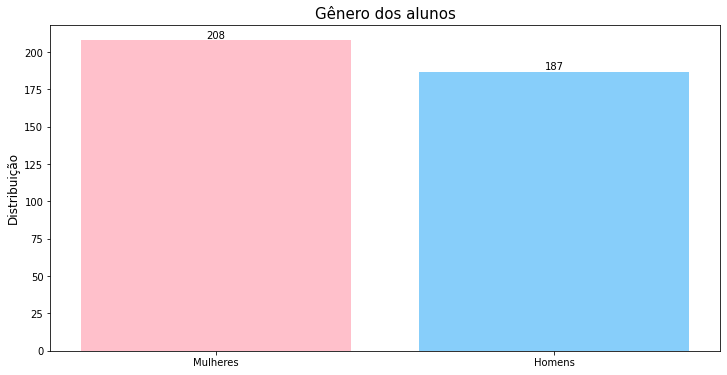

In [83]:
plt.figure(figsize=(12,6))
df_gênero = df_edu.value_counts('sex')
df_gênero.index=["Mulheres","Homens"]
gênero = plt.bar(df_gênero.index,df_gênero,color=['pink','lightskyblue'])
plt.bar_label(gênero,fmt='%.0f');
plt.title('Gênero dos alunos',fontsize=15)
plt.xlabel('')
plt.ylabel('Distribuição',fontsize=12);


In [55]:
df_edu['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

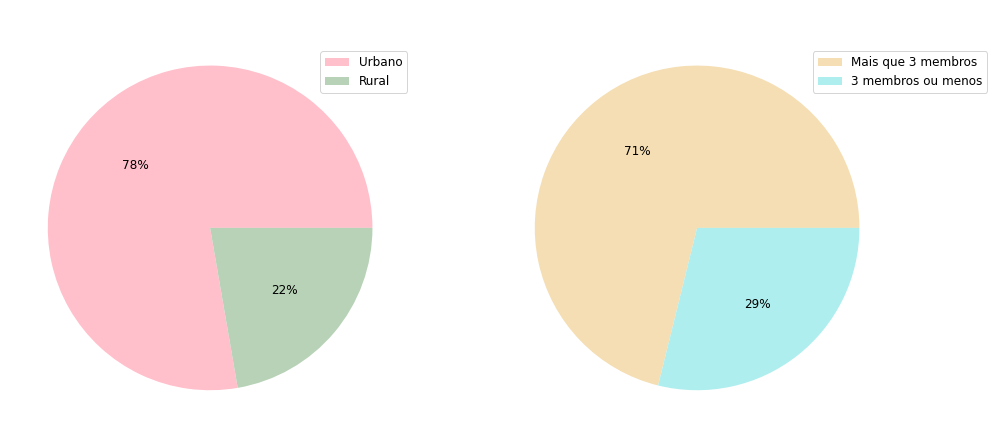

In [87]:
fig , ax = plt.subplots(1,2,figsize=(12,6))

df_edu['address'].value_counts().plot(kind='pie',fontsize=12,autopct='%1.0f%%',figsize=(16,8),colors=['pink','#B7D2B6'],labeldistance = None,ax=ax[0]);
ax[0].set_title('Distribuição dos locais de moradia dos alunos',color='white',fontsize=15)
ax[0].legend(['Urbano','Rural'],loc='upper right',fontsize=12,bbox_to_anchor = (1,0.95))
ax[0].set_ylabel("");

df_edu['famsize'].value_counts().plot(kind='pie',fontsize=12,autopct='%1.0f%%',figsize=(16,8),colors=['wheat','paleturquoise'],labeldistance = None,ax=ax[1]);
ax[1].set_title('Tamanho da família dos alunos',color='white',fontsize=15)
ax[1].legend(['Mais que 3 membros','3 membros ou menos'],loc='upper right',fontsize=12,bbox_to_anchor = (1.23,0.95))
ax[1].set_ylabel("");


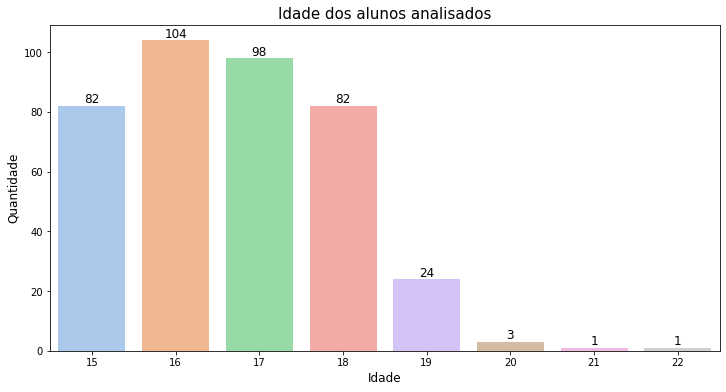

In [79]:
plt.figure(figsize=(12,6))
age = sns.countplot(data=df_edu,x='age',palette='pastel')
age.bar_label(age.containers[0],fontsize=12)
age.set_xlabel('Idade',fontsize=12)
age.set_ylabel('Quantidade',fontsize=12)
age.set_title('Idade dos alunos analisados',fontsize=15);

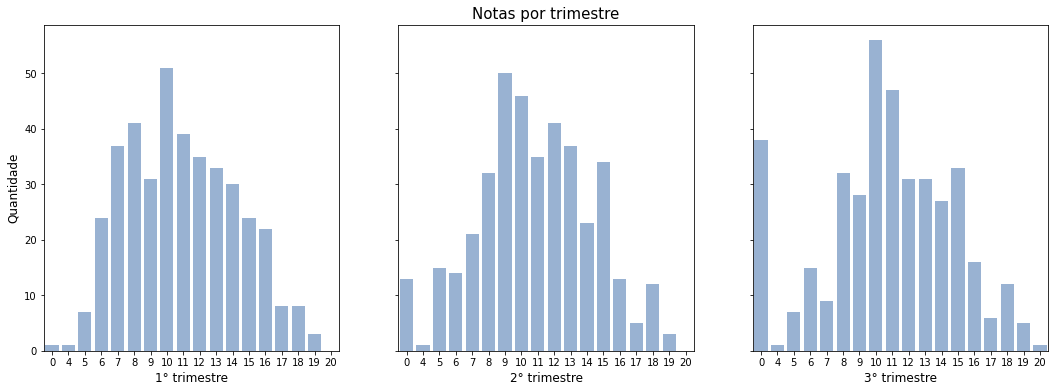

In [104]:
fig, ax = plt.subplots(1,3,figsize=(18,6),sharey=True,sharex=True)
sns.countplot(data=df_edu,x='G1',ax=ax[0],color='#90B1DB')
sns.countplot(data=df_edu,x='G2',ax=ax[1],color='#90B1DB')
sns.countplot(data=df_edu,x='G3',ax=ax[2],color='#90B1DB')
ax[1].set_title('Notas por trimestre',fontsize=15)
ax[0].set_xlabel('1° trimestre',fontsize=12)
ax[1].set_xlabel('2° trimestre',fontsize=12)
ax[2].set_xlabel('3° trimestre',fontsize=12)
ax[0].set_ylabel('Quantidade',fontsize=12)
ax[1].set_ylabel('')
ax[2].set_ylabel('');

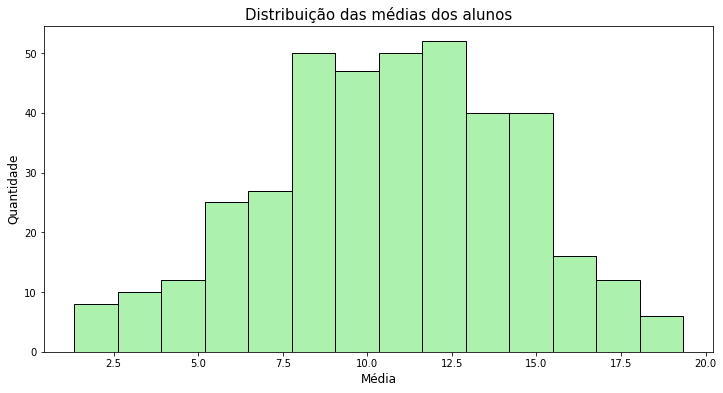

In [107]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_edu,x='media',color='lightgreen')
plt.title('Distribuição das médias dos alunos',fontsize=15)
plt.ylabel('Quantidade',fontsize=12)
plt.xlabel('Média',fontsize=12);

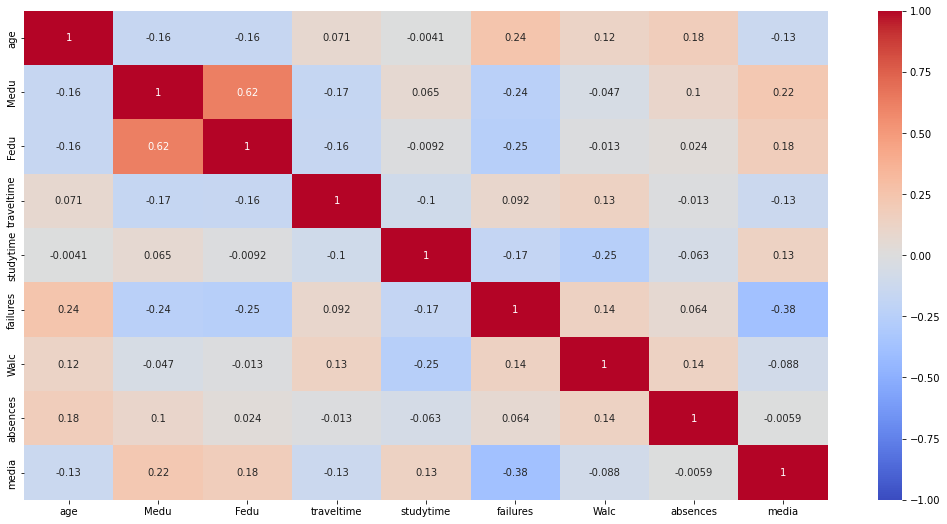

In [11]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_edu.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','Walc','absences','media']].corr(), cmap='coolwarm',vmin=-1,annot=True);


In [156]:
df_alcool = df_edu.groupby(by='Walc').mean()['studytime']

fig = px.bar(df_alcool,template='plotly_white')
fig.update_layout(
    xaxis_title='Consumo de álcool nos finais de semana',
    yaxis_title="Escala de tempo de estudo durante a semana",
    width = 1000, 
    height = 500,
    legend_title="",
    showlegend = False,
    coloraxis_showscale=False,
    title={
        'text': 'Horas estudadas semanalmente x Álcool consumido nos finais de semana',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_traces(marker_color='rgb(102,194,165)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)


In [191]:
import plotly.graph_objects as go
import plotly.offline as py

In [215]:
pais = pd.concat([df_edu.value_counts('Medu'),df_edu.value_counts('Fedu')],axis=1).sort_index()
Mulheres = go.Bar(x = ['SE','EF1','EF2','EM','ES'],
                y = pais[1],
                name='Mães',
                marker_color='pink',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=1.5)
Pais = go.Bar(x = ['SE','EF1','EF2','EM','ES'],
                y = pais[0],
                name='Pais' ,               
                marker_color='lightblue',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=1.5)
data = [Mulheres, Pais]
layout = go.Layout(title='Distribuição da escolaridade dos pais',
                   titlefont={'family':'Arial','size':22},                   
                   yaxis={'title':'Distribuição'},
                   xaxis={'title':'Distribuição'},
                   title_x = 0.5)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


In [220]:
médias_pais = pd.concat([df_edu.groupby(by='Medu').mean()['media'],df_edu.groupby(by='Fedu').mean()['media']],axis=1)
médias_pais.columns = ['Pai','Mãe']
Mulheres = go.Bar(x = ['EF1','EF2','EM','ES'],
                y = médias_pais['Mãe'][1:],
                name='Mães',
                marker_color='pink',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=1.5)
Pais = go.Bar(x = ['EF1','EF2','EM','ES'],
                y = médias_pais['Pai'][1:],
                name='Pais' ,               
                marker_color='lightblue',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=1.5)
data = [Mulheres, Pais]
layout = go.Layout(title='Distribuição da escolaridade dos pais',
                   titlefont={'family':'Arial','size':22},                   
                   yaxis={'title':'Distribuição'},
                   xaxis={'title':'Escolaridade'},
                   title_x = 0.5)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [158]:

df_medias = df_edu.groupby(by='sex').mean()['media']
df_medias.index=["Mulheres","Homens"]

fig = px.bar(df_medias)
fig.update_layout(
    xaxis_title='',
    yaxis_title="Média dos alunos",
    legend_title="",
    showlegend = False,
    title={
        'text': 'Média dos alunos por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_traces(marker_color=['pink','lightskyblue'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)




# PARAMOS AQUI DIA 29/07

In [16]:
df_tempo = df_edu.groupby(by='traveltime').mean()['media']
df_tempo.index = ['<15','entre 15 e 30','entre 30 e 60','>60']
fig = px.bar(df_tempo)
fig.update_layout(
    xaxis_title='Tempo de viagem (minutos)',
    yaxis_title="Média alunos",
    legend_title="",
    title={
        'text': 'Média dos alunos pelo tempo de viagem',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })

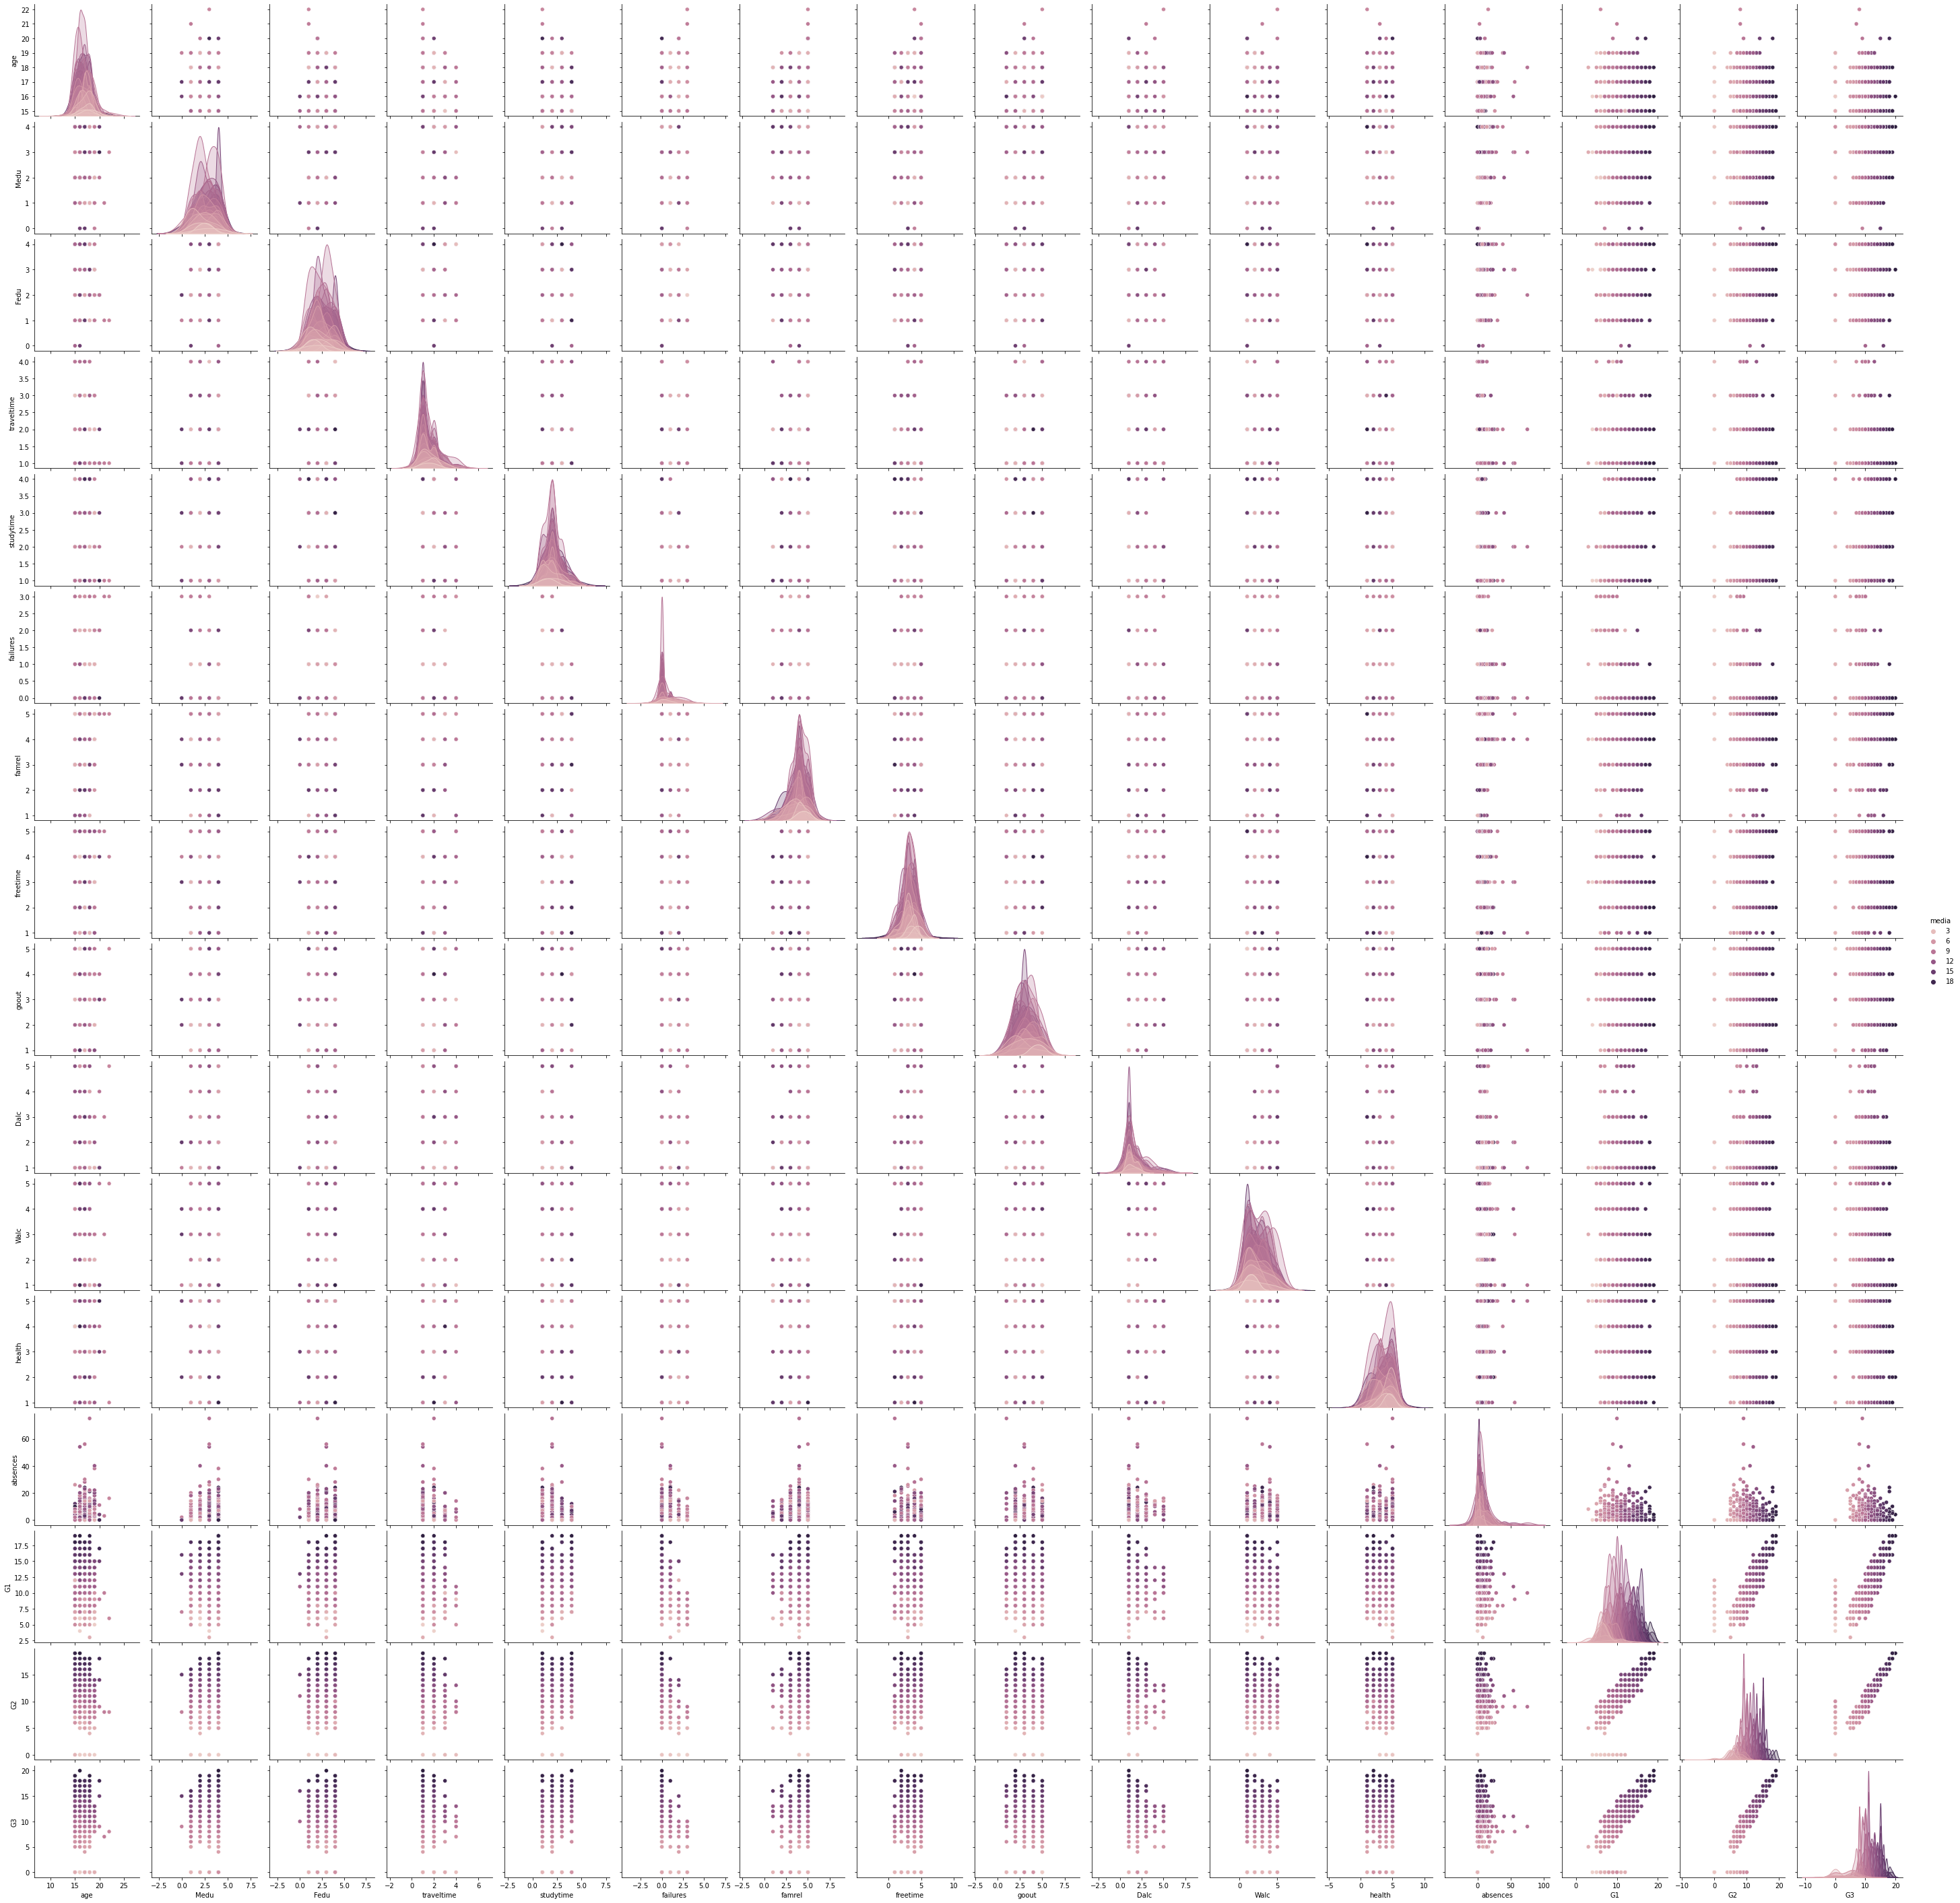

In [17]:
sns.pairplot(data=df_edu,hue='media')

In [18]:
fig = px.box(data_frame=df_edu,x='absences')
fig.update_layout(
    xaxis_title='Quantidade de faltas',
    title={
        'text': 'Boxplot',
        'x': 0.49,
        'y': 0.94,
        'font_color': 'grey'
    },
    template='none'
)

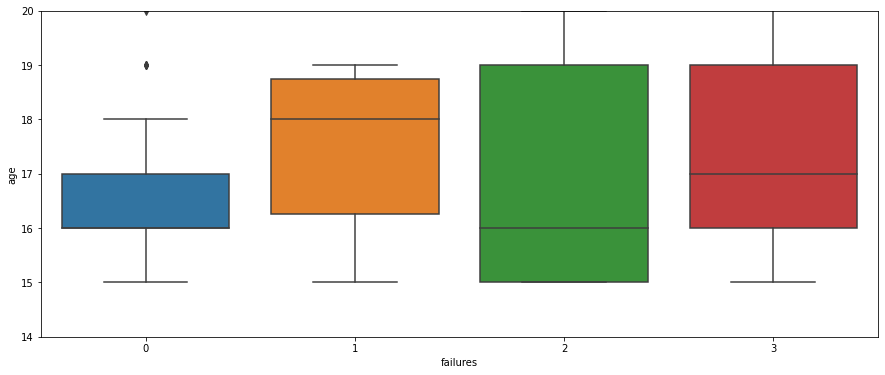

In [19]:
data = pd.concat([df_edu['age'], df_edu['failures']], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x="failures", y="age", data=data)
fig.axis(ymin=14, ymax=20);


In [20]:
df_media_reprovados = df_edu.groupby(by='failures').mean()['media']
fig = px.bar(df_media_reprovados,orientation='h',text_auto='.3')
fig.update_layout(    
    yaxis_title="Quantidade de reprovações",
    xaxis_title='Média dos alunos',
    legend_title="",
    showlegend = False,
    title={
        'text': 'Média em relação às reprovações',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_yaxes(tickvals=[0,1,2,3])

In [21]:
df_reprovados = df_edu[df_edu['failures']>0].groupby('sex').count()['media']/df_edu.value_counts('sex')
df_reprovados.index = ['Mulheres','Homens']
fig = px.bar(df_reprovados,text_auto='.2%')
fig.update_layout(    
    yaxis_title="Percentual",
    yaxis_range=[0.18,.24],
    xaxis_title=None,
    legend_title="",
    showlegend = False,
    title={
        'text': 'Porcentagem de alunos reprovados por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })

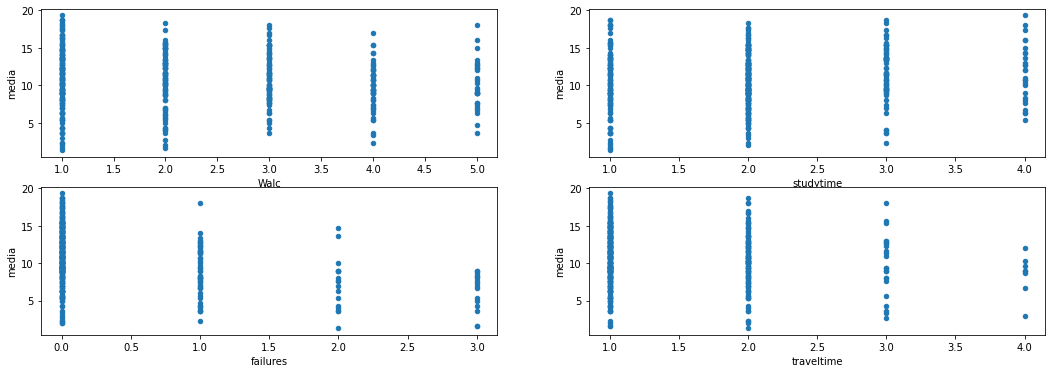

In [132]:
# alcool = df_edu.groupby(by='Walc').mean()['media'].to_frame()
# alcool.plot(kind='scatter',x=alcool.index,y=alcool.values)
# alcool = pd.pivot_table(data=df_edu,values='media',index='Walc')
# alcool.plot(kind='scatter',x=alcool.index,y=alcool['media'])
fig, ax = plt.subplots(2,2,figsize=(18,6))
df_edu.plot(x='Walc',y='media',kind='scatter',ax=ax[0,0])
df_edu.plot(x='studytime',y='media',kind='scatter',ax=ax[0,1])
df_edu.plot(x='failures',y='media',kind='scatter',ax=ax[1,0])
df_edu.plot(x='traveltime',y='media',kind='scatter',ax=ax[1,1]);
